# Microphone Input Visualizer

In [2]:
# to display in separate Tk window
import matplotlib
matplotlib.use('TkAgg')

import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.fftpack import fft
import time
from tkinter import TclError

count = [0]

# ------------ Audio Setup ---------------
# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second
# Signal range is -32k to 32k
# limiting amplitude to +/- 4k
AMPLITUDE_LIMIT = 4096

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
	format=FORMAT,
	channels=CHANNELS,
	rate=RATE,
	input=True,
	output=True,
	frames_per_buffer=CHUNK
)

# ------------ Plot Setup ---------------
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create semilogx line for spectrum, to plot the waveform as log not lin
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)
print('stream started')

def on_close(evt):
	print("Closing")
	# calculate average frame rate
	frame_rate = count[0] / (time.time() - start_time)
	
	# Close the stream and terminate pyAudio
	stream.stop_stream()
	stream.close()
	p.terminate()
	print('stream stopped')
	print('average frame rate = {:.0f} FPS'.format(frame_rate))
	quit()


def animate(i):
	# binary data
	data = stream.read(CHUNK)  
	# Open in numpy as a buffer
	data_np = np.frombuffer(data, dtype='h')

	# Update the line graph
	line.set_ydata(data_np)
	
	# compute FFT and update line
	yf = fft(data_np)
	# The fft will return complex numbers, so np.abs will return their magnitude

	line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (512 * CHUNK))

	# Update the number of frames
	count[0] += 1

if __name__ == '__main__':
	start_time = time.time()

	anim = animation.FuncAnimation(fig, animate, blit=False, interval=1)
	fig.canvas.mpl_connect('close_event',  on_close)
	plt.show()	

ModuleNotFoundError: No module named 'pyaudio'

# Clustering Wave File

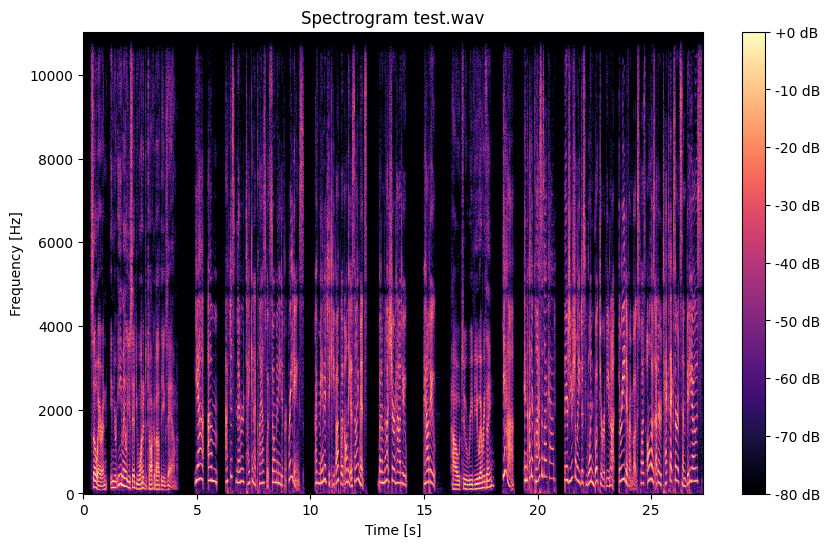

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load audiofile
y, sr = librosa.load("data/test.wav")

# Short-Time Fourier Transform (STFT)
S = librosa.stft(y)

# Conver amplitudes in decibel
S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Plotting
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram test.wav')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [2]:
a = pd.DataFrame(S_dB)
a = a.transpose()

NameError: name 'pd' is not defined

(1259,)

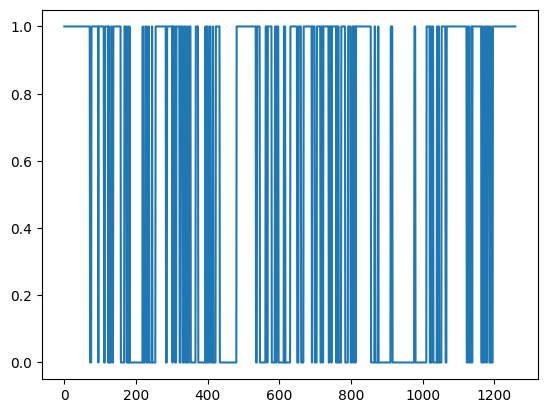

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, SpectralCoclustering, AgglomerativeClustering

clustering_model = KMeans(n_clusters = 2)
y_pred = clustering_model.fit_predict(a)

plt.plot(y_pred)
y_pred.shape